In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

from prepare import prepare_data, split_data, scale_data, xy_split

In [2]:
df = prepare_data()
df.head()

Data saved.


,age,weight (kg),height (m),max_bpm,avg_bpm,resting_bpm,session_duration (hours),calories_burned,fat_percentage
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2


In [3]:
train, val, test = split_data(df)
train.shape, val.shape, test.shape

Data split.


((681, 9), (146, 9), (146, 9))

In [4]:
train, val, test = scale_data(train, val, test)
train.head()

,age,weight (kg),height (m),max_bpm,avg_bpm,resting_bpm,session_duration (hours),calories_burned,fat_percentage
514,1.161771,-0.252634,-1.378424,-1.362717,-0.869317,0.374838,0.438446,831.0,0.175000
583,0.500951,-1.533736,-1.143590,1.305959,1.689882,1.186490,0.616864,1111.0,0.589079
926,0.005337,1.376127,1.674408,1.047700,-0.661815,-1.654293,-1.107840,656.0,-0.334635
850,0.748759,-0.205010,-0.987035,0.961613,1.551547,-1.248467,0.230292,1001.0,0.175000
423,0.335747,1.071330,0.969908,0.531182,0.929039,0.239563,0.051875,995.0,0.429818


In [6]:
X_train, y_train, X_val, y_val, X_test, y_test = xy_split(train, val, test)
X_train.head()

X and y created.


,age,weight (kg),height (m),max_bpm,avg_bpm,resting_bpm,session_duration (hours),fat_percentage
514,1.161771,-0.252634,-1.378424,-1.362717,-0.869317,0.374838,0.438446,0.175000
583,0.500951,-1.533736,-1.143590,1.305959,1.689882,1.186490,0.616864,0.589079
926,0.005337,1.376127,1.674408,1.047700,-0.661815,-1.654293,-1.107840,-0.334635
850,0.748759,-0.205010,-0.987035,0.961613,1.551547,-1.248467,0.230292,0.175000
423,0.335747,1.071330,0.969908,0.531182,0.929039,0.239563,0.051875,0.429818


Establish a baseline.

I will calculate baseline RMSE using the mean and the median, and choose the baseline with the smaller value.

In [15]:
baselines = pd.DataFrame(y_train)
baselines.head()

,calories_burned
514,831.0
583,1111.0
926,656.0
850,1001.0
423,995.0


In [16]:
baselines['median'] = baselines['calories_burned'].median()
baselines['mean'] = baselines['calories_burned'].mean()
baselines.head()

,calories_burned,median,mean
514,831.0,894.0,908.312775
583,1111.0,894.0,908.312775
926,656.0,894.0,908.312775
850,1001.0,894.0,908.312775
423,995.0,894.0,908.312775


In [17]:
np.sqrt(mean_squared_error(baselines['calories_burned'], baselines['median']))

268.621802057059

In [18]:
np.sqrt(mean_squared_error(baselines['calories_burned'], baselines['mean']))

268.24022256686897

I will use the mean as the baseline. 268.24.

Try the default parameters for linear model. I will do some work optimizing the hyperparameters for the model.

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
default_preds = lr.predict(X_train)
np.sqrt(mean_squared_error(y_train, default_preds))

48.05331793298025

Not bad, how about ones with ridge and lasso regularization.

In [27]:
lasso = Lasso().fit(X_train, y_train)
lasso_preds = lasso.predict(X_train)
np.sqrt(mean_squared_error(y_train, lasso_preds))

48.11626426475065

In [28]:
ridge = Ridge().fit(X_train, y_train)
ridge_preds = ridge.predict(X_train)
np.sqrt(mean_squared_error(y_train, ridge_preds))

48.055273686785874

In [29]:
np.sqrt(mean_squared_error(y_val, lr.predict(X_val)))

48.46306797382193

In [30]:
np.sqrt(mean_squared_error(y_val, lasso.predict(X_val)))

48.66506719459519

In [31]:
np.sqrt(mean_squared_error(y_val, ridge.predict(X_val)))

48.54539661427749

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

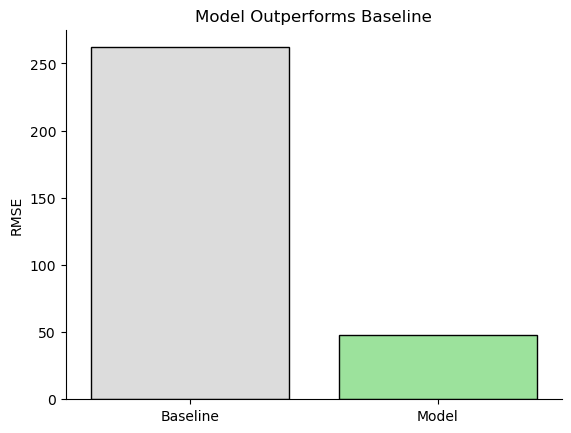

In [50]:
sns.barplot(x=['Baseline', 'Model'], y=[262, 48], palette=['gainsboro', 'lightgreen'], edgecolor='black')
sns.despine()
plt.ylabel('RMSE')
plt.title('Model Outperforms Baseline')
plt.show()